# Unsupervised Machine Learning: K-Means Clustering
### The task is to divide the iris-data into set of optimum clusters using K-means

## Importing libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

## Collecting data

In [47]:
#reading data into an object
i_data = pd.read_csv('Iris.csv')
i_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Analysis
Performing basic analysis to check different types of data and relationship in iris- data

In [48]:
#describing data only non object type
i_data.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [49]:
i_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [50]:
# find unique set of of species in 'Species' column
i_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data Wrangling

In [51]:
# check for any missing data
i_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [52]:
i_data.drop('Id' ,axis =1, inplace = True)
i_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
# creating x and y objects to classify x into y 
x = i_data.iloc[ :, [0,1,2,3]].values
y = i_data.iloc[:, [4]].values

i_data.drop('Species', axis =1, inplace = True)
i_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B08016F808>,
      dtype=object)

<Figure size 360x144 with 0 Axes>

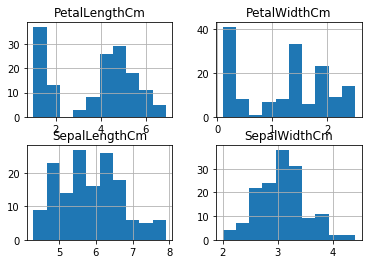

In [54]:
#ploting histogram to check various relationship
plot.figure(figsize =(5,2))
i_data.hist()

## Finding minimum number of clusters using K-Means
#### Optimum number of cluster to classify different data is found  using K-means using The Elbow curve. The point where the rate of change is maximum and closer to x axis is considered as optimum number of cluster.

In [55]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init =10, random_state =42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

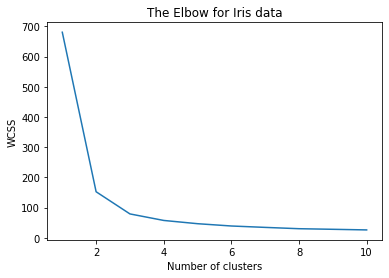

In [56]:
# ploting Elbow curve
plot.plot(range(1,11),wcss)
plot.title('The Elbow for Iris data')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')

#### Optimum number of cluster was found to be 3 using the curve.

In [57]:
#predicting different values of x into 3 clusters and classifying them into the same
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter =300, n_init =10, random_state =42)
y_kmeans = kmeans.fit_predict(x)

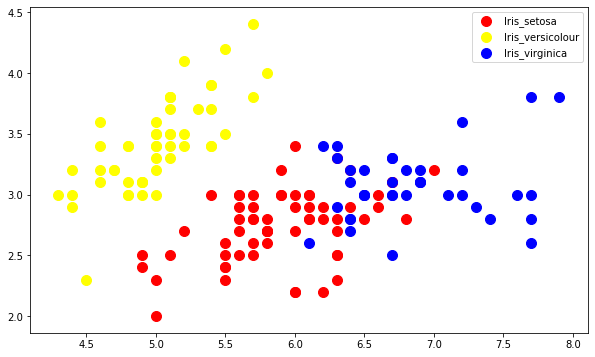

In [58]:
# cluster plotting
plot.figure(figsize =(10,6))
plot.scatter(x[y_kmeans == 0, 0], x[y_kmeans ==0, 1], s=100 , c='red', label = 'Iris_setosa')
plot.scatter(x[y_kmeans == 1, 0], x[y_kmeans ==1, 1], s=100 , c='yellow', label = 'Iris_versicolour')
plot.scatter(x[y_kmeans == 2, 0], x[y_kmeans ==2, 1], s=100 , c='blue', label = 'Iris_virginica')
plot.legend()
